In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import scienceplots
from src.styles import set_plot_style
from src.plots import *
from src.timeline import *
from src.utils import load_and_prepare_metadata
set_plot_style("prism_rain")
from src.utils import _proc_from_path, _file_index, _read_measurement
import polars as pl

In [2]:
METADATA_CSV = "metadata/Alisson_23_sept/metadata.csv"        # path to the table you pasted
BASE_DIR     = Path(".")             # where the raw CSVs live, e.g. "Alisson_04_sept/"
CHIP_NUMBER  = 72.0 
meta = load_and_prepare_metadata(METADATA_CSV, CHIP_NUMBER)
tag = Path(METADATA_CSV).stem

In [3]:
print_day_timeline(METADATA_CSV, Path("raw_data"), save_csv=False)


=== Day timeline (chronological) ===
  1  09:34:02  IVg chip 72  VDS=0.1 V  VG:-5.0→5.0 (step 0.05)  #1
  2  09:49:18  LaserCalibration λ=850.0 nm  #1
  3  09:54:47  IVg chip 72  VDS=0.1 V  VG:-5.0→5.0 (step 0.05)  #2
  4  09:55:55  It  chip 72  VG=-5.19 V  VDS=0.1 V  VL=1.4 V  λ=850.0 nm  period=120.0 s  #1
  5  09:59:30  It  chip 72  VG=-2.62 V  VDS=0.1 V  VL=1.4 V  λ=850.0 nm  period=120.0 s  #2
  6  10:02:37  It  chip 72  VG=-0.62 V  VDS=0.1 V  VL=1.4 V  λ=850.0 nm  period=120.0 s  #3
  7  10:06:11  It  chip 72  VG=1.38 V  VDS=0.1 V  VL=1.4 V  λ=850.0 nm  period=120.0 s  #4
  8  10:10:24  IVg chip 72  VDS=0.1 V  VG:-5.0→5.0 (step 0.05)  #3
  9  10:14:14  LaserCalibration λ=680.0 nm  #3
 10  10:17:24  LaserCalibration λ=680.0 nm  #4
 11  10:22:17  IVg chip 72  VDS=0.1 V  VG:-5.0→5.0 (step 0.05)  #4
 12  10:23:23  It  chip 72  VG=-2.62 V  VDS=0.1 V  VL=4.53 V  λ=680.0 nm  period=120.0 s  #5
 13  10:29:35  It  chip 72  VG=1.38 V  VDS=0.1 V  VL=4.53 V  λ=680.0 nm  period=120.0 s  #7
 

saved figs/Encap72_IVg_sequence_metadata.png


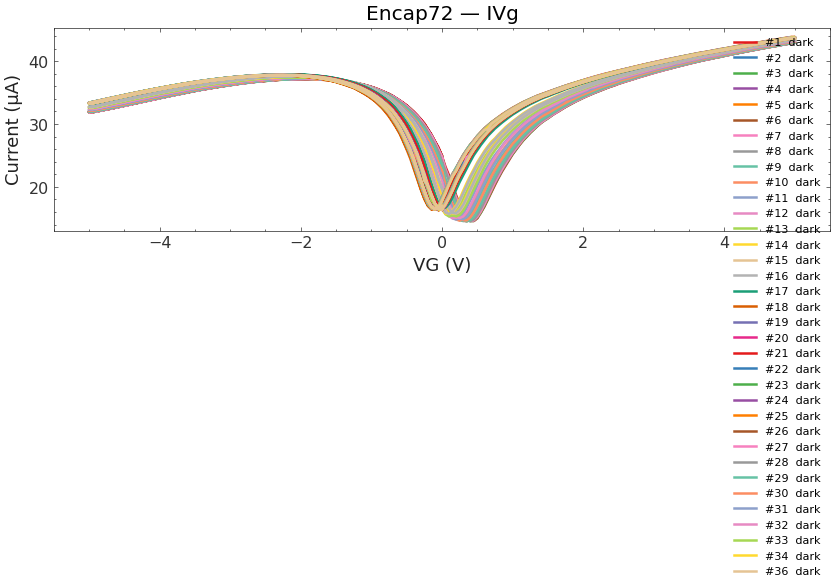

In [4]:
# Reuse your existing plotter on this subset
plot_ivg_sequence(meta, BASE_DIR, tag)


In [5]:
ivg_sequence_gif(meta, BASE_DIR, tag, fps=2, cumulative=True)

saved figs/Encap72_IVg_sequence_metadata.gif


In [6]:
plot_its_wavelength_overlay_delta_for_chip(
    meta, BASE_DIR, tag,
    chip=72,
    vg_center=-5.0, vg_window=1.5,     # your VG varies a bit in the timeline
    wavelengths=[365],                   # None => use all wavelengths present
    baseline_t=60.0, clip_t_min=20.0
)

saved figs/Chip72_ITS_dI_vs_wavelength_metadata.png


In [7]:
plot_its_wavelength_overlay_delta_for_chip(
    meta, BASE_DIR, tag,
    chip=72,
    vg_center=-5.0, vg_window=1.5,     # your VG varies a bit in the timeline
    wavelengths=[850],                   # None => use all wavelengths present
    baseline_t=60.0, clip_t_min=20.0
)

saved figs/Chip72_ITS_dI_vs_wavelength_metadata.png


In [8]:
plot_its_by_vg_delta(
    meta, BASE_DIR, tag,
    baseline_t=60, clip_t_min=20.0
)


[info] no ITS rows for Vg≈-5.19 V, λ≈365 nm
[info] no ITS rows for Vg≈-5.19 V, λ≈385 nm
[info] no ITS rows for Vg≈-5.19 V, λ≈405 nm
[info] no ITS rows for Vg≈-5.19 V, λ≈455 nm
[info] no ITS rows for Vg≈-5.19 V, λ≈505 nm
[info] no ITS rows for Vg≈-5.19 V, λ≈565 nm
[info] no ITS rows for Vg≈-5.19 V, λ≈590 nm
[info] no ITS rows for Vg≈-5.19 V, λ≈625 nm
[info] no ITS rows for Vg≈-5.19 V, λ≈680 nm
saved figs/chip72_ITS_dI_Vgm5p19_850nm_metadata.png
saved figs/chip72_ITS_dI_Vgm3p0_365nm_metadata.png
[info] no ITS rows for Vg≈-3 V, λ≈385 nm
[info] no ITS rows for Vg≈-3 V, λ≈405 nm
[info] no ITS rows for Vg≈-3 V, λ≈455 nm
[info] no ITS rows for Vg≈-3 V, λ≈505 nm
[info] no ITS rows for Vg≈-3 V, λ≈565 nm
[info] no ITS rows for Vg≈-3 V, λ≈590 nm
[info] no ITS rows for Vg≈-3 V, λ≈625 nm
[info] no ITS rows for Vg≈-3 V, λ≈680 nm
[info] no ITS rows for Vg≈-3 V, λ≈850 nm
saved figs/chip72_ITS_dI_Vgm2p8_365nm_metadata.png
[info] no ITS rows for Vg≈-2.8 V, λ≈385 nm
[info] no ITS rows for Vg≈-2.8 V, λ≈40

/Users/mphstph/python-lab/src/plots.py:1047: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


saved figs/chip72_ITS_dI_Vgm0p3_455nm_metadata.png
saved figs/chip72_ITS_dI_Vgm0p3_505nm_metadata.png
saved figs/chip72_ITS_dI_Vgm0p3_565nm_metadata.png
saved figs/chip72_ITS_dI_Vgm0p3_590nm_metadata.png
[info] no ITS rows for Vg≈-0.3 V, λ≈625 nm
[info] no ITS rows for Vg≈-0.3 V, λ≈680 nm
[info] no ITS rows for Vg≈-0.3 V, λ≈850 nm
saved figs/chip72_ITS_dI_Vg0p3_365nm_metadata.png
saved figs/chip72_ITS_dI_Vg0p3_385nm_metadata.png
saved figs/chip72_ITS_dI_Vg0p3_405nm_metadata.png
saved figs/chip72_ITS_dI_Vg0p3_455nm_metadata.png
saved figs/chip72_ITS_dI_Vg0p3_505nm_metadata.png
saved figs/chip72_ITS_dI_Vg0p3_565nm_metadata.png
saved figs/chip72_ITS_dI_Vg0p3_590nm_metadata.png
[info] no ITS rows for Vg≈0.3 V, λ≈625 nm
[info] no ITS rows for Vg≈0.3 V, λ≈680 nm
[info] no ITS rows for Vg≈0.3 V, λ≈850 nm
saved figs/chip72_ITS_dI_Vg0p75_365nm_metadata.png
[info] no ITS rows for Vg≈0.75 V, λ≈385 nm
[info] no ITS rows for Vg≈0.75 V, λ≈405 nm
[info] no ITS rows for Vg≈0.75 V, λ≈455 nm
[info] no I

In [9]:
plot_its_wavelength_overlay_delta(meta, BASE_DIR, tag, vg_center = 1.5, vg_window = 0.5, dedup_labels = False)

saved figs/Chip72_ITS_dI_vs_wavelength_metadata.png


In [10]:
plot_its_wavelength_overlay_delta(meta, BASE_DIR, tag, vg_center = -0.3, vg_window = 0.25)


saved figs/Chip72_ITS_dI_vs_wavelength_metadata.png


In [11]:
plot_its_wavelength_overlay_delta(meta, BASE_DIR, tag, vg_center = 0.3, vg_window = 0.25)

saved figs/Chip72_ITS_dI_vs_wavelength_metadata.png


In [12]:
plot_its_overlay(meta, BASE_DIR, tag)

saved figs/chip72_ITS_overlay_metadata.png


In [ ]:
def plot_its_overlay(df: pl.DataFrame, base_dir: Path, tag: str, baseline_t: float = 60.0):
    import numpy as np

    # --- small helper to extract wavelength in nm from a metadata row ---
    def _get_wavelength_nm(row: dict) -> float | None:
        candidates = [
            "Laser wavelength", "lambda", "lambda_nm", "wavelength", "wavelength_nm",
            "Wavelength", "Wavelength (nm)", "Laser wavelength (nm)", "Laser λ (nm)"
        ]
        for k in candidates:
            if k in row:
                try:
                    val = float(row[k])
                    if np.isfinite(val):
                        return val
                except Exception:
                    pass
        # Sometimes wavelength is stored as meters:
        for k in ["Wavelength (m)", "lambda_m"]:
            if k in row:
                try:
                    val = float(row[k]) * 1e9
                    if np.isfinite(val):
                        return val
                except Exception:
                    pass
        return None

    its = df.filter(pl.col("proc") == "ITS").sort("file_idx")
    if its.height == 0:
        print("[warn] no ITS rows in metadata")
        return

    plt.figure()
    curves_plotted = 0

    t_totals = []
    starts_vl, ends_vl = [], []
    on_durations_meta = []

    for row in its.iter_rows(named=True):
        path = base_dir / row["source_file"]
        if not path.exists():
            print(f"[warn] missing file: {path}")
            continue

        d = _read_measurement(path)
        if not {"t", "I"} <= set(d.columns):
            print(f"[warn] {path} lacks t/I; got {d.columns}")
            continue

        tt = np.asarray(d["t"])
        yy = np.asarray(d["I"])
        if tt.size == 0 or yy.size == 0:
            print(f"[warn] empty/invalid series in {path}")
            continue
        if not np.all(np.diff(tt) >= 0):
            idx = np.argsort(tt)
            tt = tt[idx]; yy = yy[idx]

        # baseline @ baseline_t
        if tt[0] <= baseline_t <= tt[-1]:
            I0 = float(np.interp(baseline_t, tt, yy))
        else:
            nearest_idx = int(np.argmin(np.abs(tt - baseline_t)))
            I0 = float(yy[nearest_idx])
            print(f"[info] {path.name}: baseline_t={baseline_t:g}s outside [{tt[0]:.3g},{tt[-1]:.3g}]s; "
                  f"used nearest t={tt[nearest_idx]:.3g}s")
        yy_corr = yy - I0

        # --- label: wavelength only ---
        wl = _get_wavelength_nm(row)
        if wl is not None:
            lbl = f"{wl:g} nm"
        else:
            lbl = f"#{int(row['file_idx'])}"  # fallback if wavelength missing

        plt.plot(tt, yy_corr*1e6, label=lbl)
        curves_plotted += 1

        try:
            t_totals.append(float(tt[-1]))
        except Exception:
            pass

        if "VL" in d.columns:
            try:
                vl = np.asarray(d["VL"])
                on_idx = np.where(vl > 0)[0]
                if on_idx.size:
                    starts_vl.append(float(tt[on_idx[0]]))
                    ends_vl.append(float(tt[on_idx[-1]]))
            except Exception:
                pass

        if "Laser ON+OFF period" in its.columns:
            try:
                on_durations_meta.append(float(row["Laser ON+OFF period"]))
            except Exception:
                pass

    if curves_plotted == 0:
        print("[warn] no ITS traces plotted; skipping light-window shading")
        return

    if t_totals:
        T_total = float(np.median(t_totals))
        if np.isfinite(T_total) and T_total > 0:
            plt.xlim(20, T_total)

    t0 = t1 = None
    if starts_vl and ends_vl:
        t0 = float(np.median(starts_vl)); t1 = float(np.median(ends_vl))
    if (t0 is None or t1 is None) and on_durations_meta and t_totals:
        on_dur = float(np.median(on_durations_meta))
        T_total = float(np.median(t_totals))
        if np.isfinite(on_dur) and np.isfinite(T_total) and T_total > 0:
            pre_off = max(0.0, (T_total - on_dur) / 2.0)
            t0 = pre_off; t1 = pre_off + on_dur
    if (t0 is None or t1 is None) and t_totals:
        T_total = float(np.median(t_totals))
        if np.isfinite(T_total) and T_total > 0:
            t0 = T_total / 3.0; t1 = 2.0 * T_total / 3.0
    if (t0 is not None) and (t1 is not None) and (t1 > t0):
        plt.axvspan(t0, t1, alpha=0.15)

    plt.xlabel("t (s)")
    plt.ylabel(f"ΔCurrent (µA)")
    plt.title(f"Chip {int(df['Chip number'][0])} — ITS overlay (baseline @ {baseline_t:g}s)")
    plt.legend(fontsize=8, title="Wavelength")
    plt.tight_layout()
    out = FIG_DIR / f"chip{int(df['Chip number'][0])}_ITS_overlay_{tag}.png"
    plt.savefig(out, dpi=200)
    print(f"saved {out}")


In [14]:
good_its = [2,5,8,11,12,13,14,15,16,17]  # the _NN.csv numbers you want

meta_only_good_it= meta.filter(
    (pl.col("proc") == "ITS") & pl.col("file_idx").is_in(good_its)
)

# Reuse your existing plotter on this subset
plot_its_overlay(meta_only_good_it, BASE_DIR, tag) 

saved figs/chip72_ITS_overlay_metadata.png


In [15]:
from matplotlib.lines import Line2D
from matplotlib import patheffects as pe

def plot_ivg_unrolled_I_vs_t(
    df: pl.DataFrame,
    base_dir: Path,
    tag: str,
    *,
    line_freq_hz: float = 50.0,
    use_clock_if_available: bool = True,
    clip_t_min: float | None = None,
    show_legend: bool = False,
):
    # --- robust sort: prefer start_time, else session, else file_idx only ---
    sort_cols = [c for c in ("start_time", "session", "file_idx") if c in df.columns]
    if not sort_cols:
        sort_cols = ["file_idx"]  # absolute last resort

    ivg = df.filter(pl.col("proc") == "IVg").sort(sort_cols, nulls_last=True)
    if ivg.height == 0:
        print("[info] no IVg rows to plot")
        return

    def _derive_time_series_ivg(d: pl.DataFrame, row: dict) -> np.ndarray:
        # 1) file clock if present
        if use_clock_if_available:
            for cname in ("Clock", "Clock (ms)"):
                if cname in d.columns:
                    clk = d[cname].to_numpy()
                    if clk.size and np.isfinite(clk).any():
                        clk0 = np.nanmin(clk)
                        return (clk - clk0) / (1000.0 if "ms" in cname.lower() else 1.0)

        n = d.height

        # 2) metadata Step time (in seconds) if > 0
        step_time = None
        for k in ("Step time", "Step time (s)", "step_time", "Step time_meta"):
            if k in row and row[k] is not None:
                try:
                    step_time = float(row[k]); break
                except Exception:
                    pass
        if step_time and np.isfinite(step_time) and step_time > 0:
            return np.arange(n, dtype=float) * step_time

        # 3) estimate dt from NPLC/mains
        nplc = None
        for k in ("NPLC", "NPLC_meta"):
            if k in row and row[k] is not None:
                try:
                    nplc = float(row[k]); break
                except Exception:
                    pass
        if nplc and np.isfinite(nplc) and nplc > 0 and line_freq_hz > 0:
            dt = nplc / float(line_freq_hz)  # ~0.02 s @50 Hz when NPLC=1
            return np.arange(n, dtype=float) * dt

        # 4) fallback: 1 s/sample
        return np.arange(n, dtype=float)

    # set up a 2-row figure sharing time axis
    fig, (ax_vg, ax_i) = plt.subplots(
        nrows=2, ncols=1, sharex=True,
        gridspec_kw={"height_ratios": [1, 3]},
        figsize=(10, 6)
    )

    all_T = []
    warned_vg_missing = False
    vg_candidates = ("VG", "Vg", "Vg (V)", "VG (V)", "Gate", "Gate (V)", "V_G", "Vgate")

    # ---------------------------
    # First pass: collect entries
    # ---------------------------
    entries = []
    for row in ivg.iter_rows(named=True):
        path = base_dir / row["source_file"]
        if not path.exists():
            print(f"[warn] missing file: {path}")
            continue

        d = _read_measurement(path)

        if "I" not in d.columns:
            print(f"[warn] {path} lacks 'I'; got {d.columns}")
            continue

        vg_col = next((c for c in vg_candidates if c in d.columns), None)
        if vg_col is None and not warned_vg_missing:
            print(f"[warn] no gate-voltage column found in {path}; tried {vg_candidates}")
            warned_vg_missing = True

        t = _derive_time_series_ivg(d, row)
        I = d["I"].to_numpy()
        VG = d[vg_col].to_numpy() if vg_col else None

        if clip_t_min is not None:
            m = t >= float(clip_t_min)
            t, I = t[m], I[m]
            if VG is not None:
                VG = VG[m]

        if t.size == 0:
            continue

        # normalize time to start at zero
        t = t - t[0]
        lbl = f"#{int(row['file_idx'])}  {'light' if row.get('with_light', False) else 'dark'}"
        entries.append({"t": t, "I": I, "VG": VG, "label": lbl})

    if not entries:
        print("[warn] no IVg curves plotted as I(t)")
        plt.close(fig)
        return

    # ---------------------------
    # Second pass: plot with emphasis
    # ---------------------------
    n = len(entries)
    first_idx = 0
    last_idx = n - 1

    first_color = "#e41a1c"   # red
    last_color  = "#4daf4a"   # green
    other_color = "#808080"   # mid gray

    # thin, de-emphasized “others”
    other_style_i  = dict(color=other_color, lw=0.9, alpha=0.5, zorder=1)
    other_style_vg = dict(color=other_color, lw=0.8, alpha=0.5, zorder=1, ls=":")

    # path effect for glow around highlights (helps over dense overlays)
    glow = [pe.Stroke(linewidth=4.0, foreground="white", alpha=0.9), pe.Normal()]

    # plot “others” first so highlights sit on top
    for i, e in enumerate(entries):
        if n > 1 and i in (first_idx, last_idx):
            continue
        t, I, VG = e["t"], e["I"], e["VG"]
        all_T.append(t[-1])
        ax_i.plot(t, I * 1e6, **other_style_i)
        if VG is not None:
            ax_vg.plot(t, VG, **other_style_vg)

    # helper to plot a highlighted trace with glow + markers at ends
    def plot_highlight(t, y_i, y_vg, color, label_text):
        li, = ax_i.plot(t, y_i * 1e6, color=color, lw=2.6, alpha=0.95, zorder=4)
        li.set_path_effects(glow)
        if y_vg is not None:
            lv, = ax_vg.plot(t, y_vg, color=color, lw=2.0, alpha=0.95, zorder=4)
            lv.set_path_effects(glow)
        # small end markers + annotations (both panels)
        ax_i.plot([t[0], t[-1]], [y_i[0]*1e6, y_i[-1]*1e6], marker="o", ms=3, mec="none", mfc=color, ls="None", zorder=5)
        ax_i.annotate(label_text, xy=(t[-1], y_i[-1]*1e6), xytext=(6, 0),
                      textcoords="offset points", va="center", color=color, fontsize=9,
                      path_effects=[pe.withStroke(linewidth=3, foreground="white")])
        if y_vg is not None:
            ax_vg.plot([t[0], t[-1]], [y_vg[0], y_vg[-1]], marker="o", ms=3, mec="none", mfc=color, ls="None", zorder=5)
            ax_vg.annotate(label_text, xy=(t[-1], y_vg[-1]), xytext=(6, 0),
                           textcoords="offset points", va="center", color=color, fontsize=9,
                           path_effects=[pe.withStroke(linewidth=3, foreground="white")])

    # plot first
    t0, I0, VG0 = entries[first_idx]["t"], entries[first_idx]["I"], entries[first_idx]["VG"]
    all_T.append(t0[-1])
    plot_highlight(t0, I0, VG0, first_color, "first")

    # plot last (if distinct)
    if last_idx != first_idx:
        tL, IL, VGL = entries[last_idx]["t"], entries[last_idx]["I"], entries[last_idx]["VG"]
        all_T.append(tL[-1])
        plot_highlight(tL, IL, VGL, last_color, "last")

    # --- labels, limits, cosmetics ---
    ax_vg.set_ylabel(r"$V_G$ (V)")
    ax_i.set_ylabel("Current (µA)")
    ax_i.set_xlabel("Time (s)")

    title_chip = f"Encap{int(df['Chip number'][0])}" if 'Chip number' in df.columns else "Chip"
    fig.suptitle(f"{title_chip} — IVg as I(t) with $V_G(t)$", y=0.98)

    Tmax = float(np.nanmedian(all_T))
    if np.isfinite(Tmax) and Tmax > 0:
        t0 = float(clip_t_min) if clip_t_min else 0.0
        ax_i.set_xlim(t0, Tmax)


    # compact legend that only encodes meaning of colors
    legend_handles = [
        Line2D([0], [0], color=first_color, lw=2.6, label="first IVg"),
        Line2D([0], [0], color=last_color,  lw=2.6, label="last IVg"),
        Line2D([0], [0], color=other_color, lw=1.2, alpha=0.4, label="others"),
    ]
    if show_legend:
        ax_i.legend(handles=legend_handles, fontsize=8, loc="upper right", frameon=True)
    # else: keep uncluttered

    plt.tight_layout()
    suffix = "_IVg_I_vs_t_overlay_with_VG"
    out = FIG_DIR / f"{title_chip}{suffix}_{tag}.png"
    plt.plot()
    fig.savefig(out, dpi=300)
    print(f"saved {out}")

plot_ivg_unrolled_I_vs_t(meta, BASE_DIR, tag, clip_t_min=0)

saved figs/Encap72_IVg_I_vs_t_overlay_with_VG_metadata.png


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import patheffects as pe

def plot_ivg_unrolled_I_polar_only(
    df: pl.DataFrame,
    base_dir: Path,
    tag: str,
    *,
    line_freq_hz: float = 50.0,
    use_clock_if_available: bool = True,
    clip_t_min: float | None = None,
    show_legend: bool = False,
):
    # --- robust sort: prefer start_time, else session, else file_idx only ---
    sort_cols = [c for c in ("start_time", "session", "file_idx") if c in df.columns]
    if not sort_cols:
        sort_cols = ["file_idx"]

    ivg = df.filter(pl.col("proc") == "IVg").sort(sort_cols, nulls_last=True)
    if ivg.height == 0:
        print("[info] no IVg rows to plot"); return

    def _derive_time_series_ivg(d: pl.DataFrame, row: dict) -> np.ndarray:
        if use_clock_if_available:
            for cname in ("Clock", "Clock (ms)"):
                if cname in d.columns:
                    clk = d[cname].to_numpy()
                    if clk.size and np.isfinite(clk).any():
                        clk0 = np.nanmin(clk)
                        return (clk - clk0) / (1000.0 if "ms" in cname.lower() else 1.0)
        n = d.height
        for k in ("Step time", "Step time (s)", "step_time", "Step time_meta"):
            if k in row and row[k] is not None:
                try:
                    st = float(row[k])
                    if np.isfinite(st) and st > 0: return np.arange(n, dtype=float) * st
                except Exception:
                    pass
        for k in ("NPLC", "NPLC_meta"):
            if k in row and row[k] is not None and line_freq_hz > 0:
                try:
                    nplc = float(row[k])
                    if np.isfinite(nplc) and nplc > 0:
                        dt = nplc / float(line_freq_hz)
                        return np.arange(n, dtype=float) * dt
                except Exception:
                    pass
        return np.arange(n, dtype=float)

    # -------- collect entries & global ranges --------
    entries = []
    Tmax_candidates, I_abs_max_candidates, I_abs_min_candidates = [], [], []

    for row in ivg.iter_rows(named=True):
        path = base_dir / row["source_file"]
        if not path.exists():
            print(f"[warn] missing file: {path}"); continue
        d = _read_measurement(path)
        if "I" not in d.columns:
            print(f"[warn] {path} lacks 'I'; got {d.columns}"); continue

        t = _derive_time_series_ivg(d, row)
        I = d["I"].to_numpy()

        if clip_t_min is not None:
            m = t >= float(clip_t_min)
            t, I = t[m], I[m]
        if t.size == 0: continue

        t = t - t[0]
        I_abs = np.abs(I)

        Tmax_candidates.append(t[-1])
        if np.isfinite(I_abs).any():
            I_abs_max_candidates.append(np.nanmax(I_abs))
            I_abs_min_candidates.append(np.nanmin(I_abs))

        lbl = f"#{int(row['file_idx'])}  {'light' if row.get('with_light', False) else 'dark'}"
        entries.append({"t": t, "I_abs": I_abs, "label": lbl})

    if not entries:
        print("[warn] no IVg curves to plot"); return

    Tmax = float(np.nanmax(Tmax_candidates)) if Tmax_candidates else 0.0
    if not np.isfinite(Tmax) or Tmax <= 0:
        print("[warn] invalid total time; cannot make polar mapping"); return

    I_abs_max = float(np.nanmax(I_abs_max_candidates)) if I_abs_max_candidates else 1.0
    I_abs_min = float(np.nanmin(I_abs_min_candidates)) if I_abs_min_candidates else 0.0
    denom = I_abs_max - I_abs_min
    if not np.isfinite(denom) or denom <= 0:
        denom = 1.0  # avoids divide-by-zero; all radii become ~0

    TWO_PI = 2.0 * np.pi
    for e in entries:
        e["theta"] = (e["t"] / Tmax) * TWO_PI
        # --- min–max normalization to [0, 1] ---
        e["r"] = (e["I_abs"] - I_abs_min) / denom
        # clip for numerical noise
        e["r"] = np.clip(e["r"], 0.0, 1.0)

    # -------- plot (single polar figure) --------
    fig = plt.figure(figsize=(8.5, 7))
    ax = fig.add_subplot(111, projection="polar")

    n = len(entries)
    first_idx, last_idx = 0, n - 1

    first_color = "#e41a1c"
    last_color  = "#4daf4a"
    other_color = "#808080"

    other_style = dict(color=other_color, lw=0.9, alpha=0.5, zorder=1)
    glow = [pe.Stroke(linewidth=4.0, foreground="white", alpha=0.9), pe.Normal()]

    for i, e in enumerate(entries):
        if n > 1 and i in (first_idx, last_idx): continue
        ax.plot(e["theta"], e["r"], **other_style)

    def plot_highlight(e, color, label_text):
        li, = ax.plot(e["theta"], e["r"], color=color, lw=2.6, alpha=0.95, zorder=3)
        li.set_path_effects(glow)
        ax.plot([e["theta"][-1]], [e["r"][-1]], marker="o", ms=3, mec="none", mfc=color, zorder=4)
        ax.annotate(label_text, xy=(e["theta"][-1], e["r"][-1]), xytext=(6, 0),
                    textcoords="offset points", va="center", color=color, fontsize=9,
                    path_effects=[pe.withStroke(linewidth=3, foreground="white")])

    plot_highlight(entries[first_idx], first_color, "first")
    if last_idx != first_idx:
        plot_highlight(entries[last_idx],  last_color,  "last")

    ax.set_title("I(θ) — polar view (min→0, max→1; time→angle)", pad=12)
    ax.set_rlim(0.0, 1.02)
    ax.set_rlabel_position(135)

    if show_legend:
        ax.legend([
            Line2D([0], [0], color=first_color, lw=2.6, label="first IVg"),
            Line2D([0], [0], color=last_color,  lw=2.6, label="last IVg"),
            Line2D([0], [0], color=other_color, lw=1.2, alpha=0.4, label="others"),
        ], fontsize=8, loc="upper right", frameon=True)

    title_chip = f"Encap{int(df['Chip number'][0])}" if 'Chip number' in df.columns else "Chip"
    out = FIG_DIR / f"{title_chip}_IVg_polar_minmax_{tag}.png"
    plt.tight_layout()
    fig.savefig(out, dpi=300)
    print(f"saved {out}")

plot_ivg_unrolled_I_polar_only(meta, BASE_DIR, tag, clip_t_min=0)

saved figs/Encap72_IVg_polar_minmax_metadata.png
